# Identifying and Tracking Solar Magnetic Flux Elements with Deep Learning

### Haodi Jiang et al.

New Jersey Institute of Technology



## 1. Introduction

Deep learning has drawn a lot of interest in recent years due to its effectiveness in processing
big and complex observational data gathered from diverse instruments.
Here we propose a new deep learning method, called SolarUnet,
to identify and track solar magnetic flux elements or features in observed vector
magnetograms. SolarUnet is applied to data from the 1.6 meter Goode Solar
Telescope at the Big Bear Solar Observatory.

In this notebook, we provide an overview of the scikit-downscale project,
detailing how it can be used to downscale a range of surface climate
variables such as surface air temperature and precipitation.
We also highlight how scikit-downscale framework is being used
to compare exisiting methods and how it can be extended to support
the development of new downscaling methods.


## 2. Workflow of SolarUnet


### 2.1 Data Preparation


Import the pre_process() function from solarUnet module.

Convert the SWAMIS 3-class mask to 2-class mask for model training.
You may put your data into this directory.

In [1]:
from solarUnet import pre_process
input_path = 'data/exmaple_data_preprocess/3_class/'
output_path = 'data/exmaple_data_preprocess/2_class/'
pre_process(input_path, output_path)

Using TensorFlow backend.


intgr_180607_161752.fts
intgr_180607_161904.fts


### 2.2 Model Training and Testing

You may train the model with you own data or directly use the pretrained model for prediction
and feature tracking.

#### 2.2.1 Training and Predicting

Import the model_training(), model_predict() functions from solarUnet module.

The model is trained with the prepared data in previous step and tested on the given
megnetorgrams. Please make sure your input data is at given directory or you may creat
your own directory and modify the path. The predicted results will be saved in the given path.


In [1]:
from solarUnet import model_training, model_predict
input_path ='data/magnetic/'
output_path ='results/predicted_mask/'
model_training(input_path)
model_predict(input_path, output_path)


Using TensorFlow backend.


Epoch 1/1
Found 196 images belonging to 1 classes.
Found 196 images belonging to 1 classes.
 - 2435s - loss: 0.1347 - acc: 0.9427

Epoch 00001: loss improved from inf to 0.13468, saving model to solarUnet_magnetic.hdf5
3/3 [==============================] - 1s 248ms/step
Prediction on the given data done


##### 2.2.2 Predicting with Pretrained model

Import model_predict() functions from solarUnet module.

Predict the mask of given magnetogram by using the pretrained model.
We set the 3rd argument of model_predict() as True.
The predicted results will be saved in the given path.

In [2]:
from solarUnet import model_predict
input_path ='data/magnetic/'
output_path ='results/predicted_mask/'
model_predict(input_path, output_path, True)

3/3 [==============================] - 1s 267ms/step
Prediction on the given data done


### 2.3 Postprocess Data

Import post_process() functions from solarUnet module.

Convert predicted binary mask to 3-class mask. Plot an example mask.

In [1]:
from solarUnet import post_process
post_process()

Using TensorFlow backend.


Postprocess done


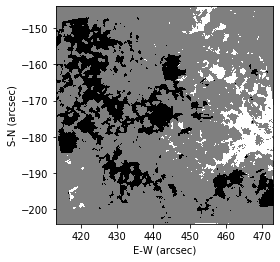

In [2]:
from solarUnet import plot_mask
%matplotlib inline
plot_mask()

### 2.4 Magnetic Tracking

Import magnetic_tracking() functions from magnetic_tracking module.

Magnetic tracking algorithm is performed on the three consecutive testing magentograms.
An option of saving feature lifetime was provided by 3rd argument of
function magnetic_tracking(). The tracking results will be saved at the given path.


In [1]:
from magnetic_tracking import *
input_path = 'results/processed_data_for_tracking/'
output_path = 'results/tracking_results/'
# lifetime_path = 'data/statistics_analysis/lifetime'
magnetic_tracking(input_path, output_path)
#magnetic_tracking(input_path, output_path, lifetime_path)

============magnetic tracking start============
-----------------process frame 1------------------
-----------------process frame 2------------------
-----------------process frame 3------------------
-----------------Done------------------


Using TensorFlow backend.


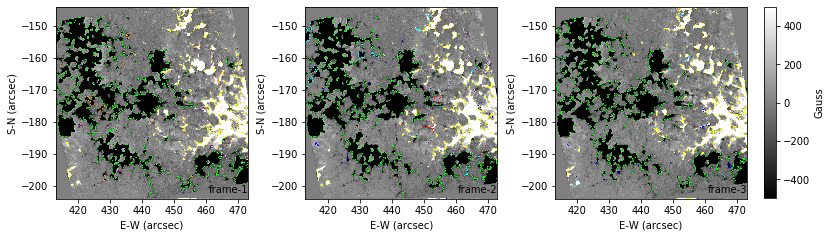

In [2]:
from solarUnet import plot_tracking_results
%matplotlib inline
plot_tracking_results()

### 2.5 Statistics Analysis
Import analysis() from statistics_analysis module.

The statistics analysis in this work is demoed as follow:


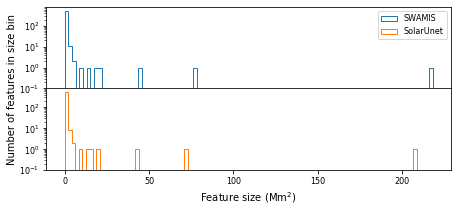

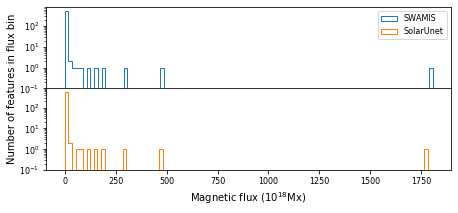

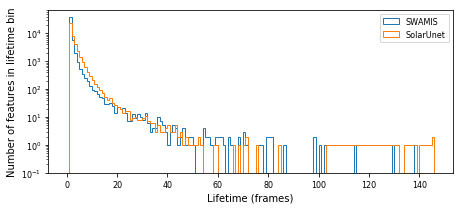

In [3]:
from statistics_analysis import analysis
%matplotlib inline
analysis()


## 3. Conclusion

We develop a deep learning method, SolarUnet, for tracking signed magnetic flux
elements (features) and detecting magnetic events in observed vector magnetograms.
We apply the SolarUnet tool to data from the 1.6 meter Goode Solar Telescope (GST)
at the Big Bear Solar Observatory (BBSO). The tool is able to identify the magnetic
features and detect three types of events, namely disappearance, merging and
cancellation, in the death category and three types of events, namely appearance,
splitting and emergence, in the birth category. We use the BBSO/GST images to illustrate how our tool works on feature
identification and event detection, and compares with the widely used SWAMIS tool (DeForest et al. 2007).

## Acknowledgment

We thank the BBSO/GST team for providing the data used in this study.
This work was supported by NSF grant AGS-1927578. C.L. and H.W.
acknowledge the support of NASA under grants NNX16AF72G,
80NSSC18K0673, 80NSSC18K1705, and NSF under grant AGS-1821294,AGS-1954737.